# DZ «Модели ARMA»

In [49]:
import pandas as pd
import numpy as np
import tqdm

import matplotlib.pyplot as plt

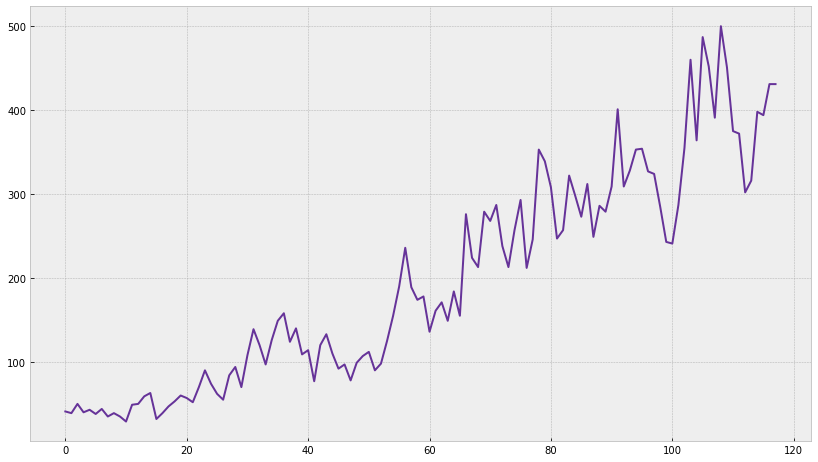

In [50]:
# Series visualization
boston_armed_robberies_j = pd.read_csv("1._Лекция_tsml/Series/monthly-boston-armed-robberies-j.csv")
# boston_armed_robberies_j

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(boston_armed_robberies_j["Count"], color='rebeccapurple')

In [51]:
# Boxcox tansformarion for dispersion's normalization
from scipy.stats import boxcox

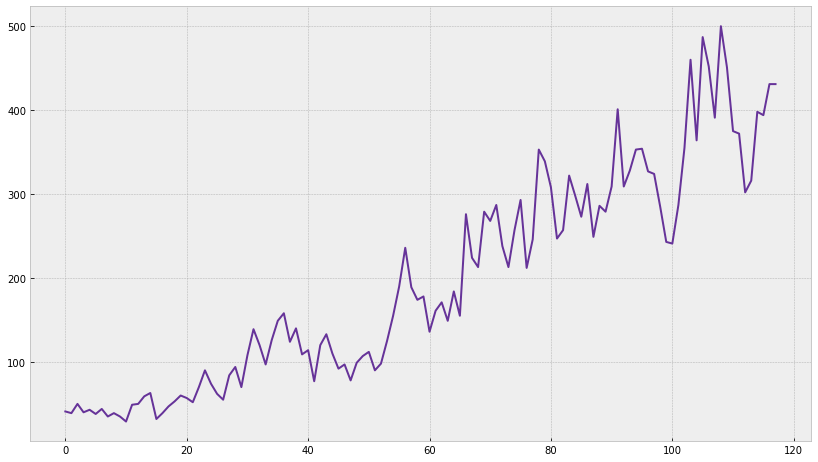

In [52]:
series_boston_rob = boxcox(boston_armed_robberies_j['Count'], 0)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(boston_armed_robberies_j['Count'], color='rebeccapurple')

In [53]:
# Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

# Correlograms
import statsmodels.api as sm
# import statsmodels.tsa.api as tsa
import statsmodels.tsa.api as smt

In [54]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [55]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='rebeccapurple', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


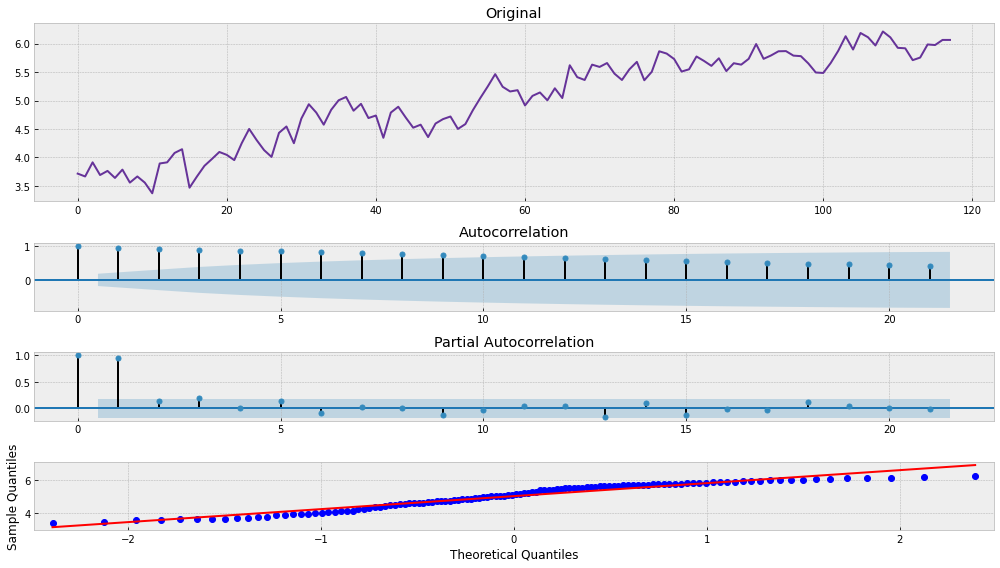

In [56]:
tsplot(series_boston_rob)

!! p-value 0.280833

In [57]:
# Differentiation
series_boston_rob = np.diff(series_boston_rob, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


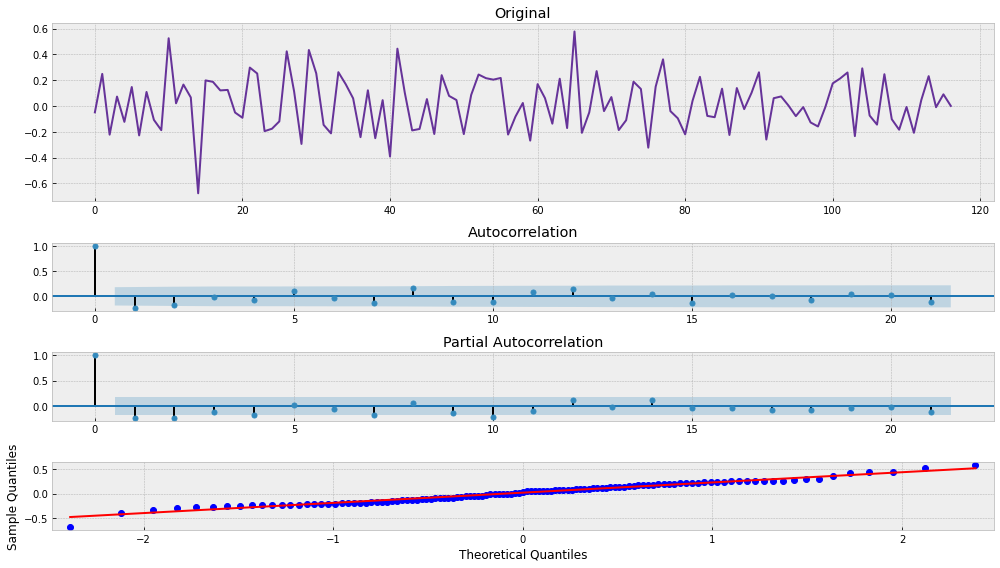

In [58]:
tsplot(series_boston_rob)

!! p-value 2.378602e-11

In [59]:
mdl = smt.AR(series_boston_rob).fit(maxlag=30, ic='aic', trend='nc')
print(mdl.params)

[-0.25063179 -0.29022693 -0.13305151 -0.10957036  0.05890155 -0.03995412
 -0.11039248  0.13101783 -0.10976753 -0.04739541  0.08148498  0.23693928
  0.07996709  0.18711767]


C:\Users\kimta\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                -1.048391e+01
p-value                        1.193976e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64


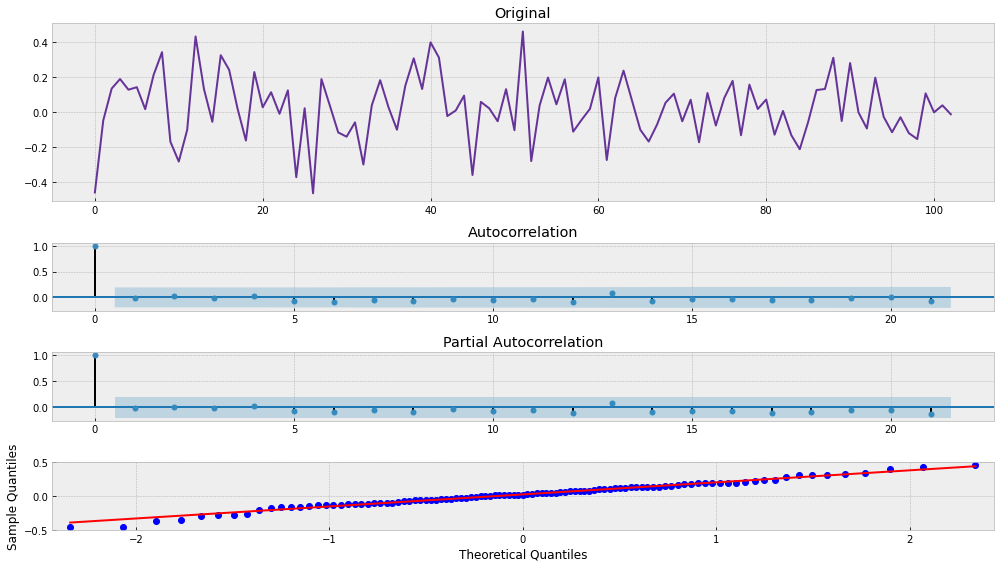

In [60]:
tsplot(mdl.resid)

In [61]:
# Differentiation again
series_boston_rob_2 = np.diff(mdl.resid, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.020738e+01
p-value                        5.756948e-18
#Lags Used                     2.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


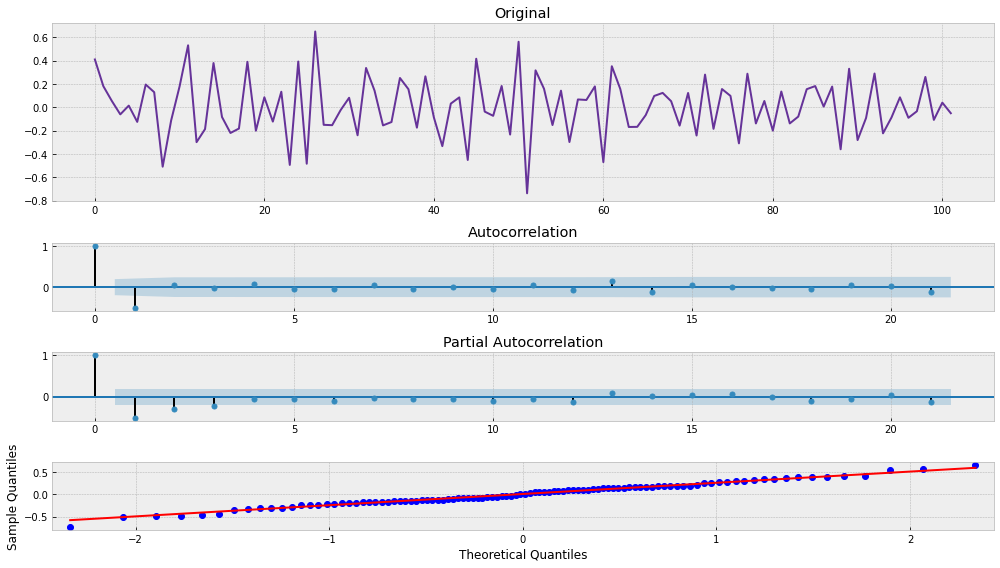

In [62]:
tsplot(series_boston_rob_2)

In [63]:
mdl_diffed = smt.AR(series_boston_rob_2).fit(maxlag=30, ic='aic', trend='nc')
print(mdl_diffed.params)

[-0.68328438 -0.30239686]


C:\Users\kimta\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                -1.110290e+01
p-value                        3.825662e-20
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


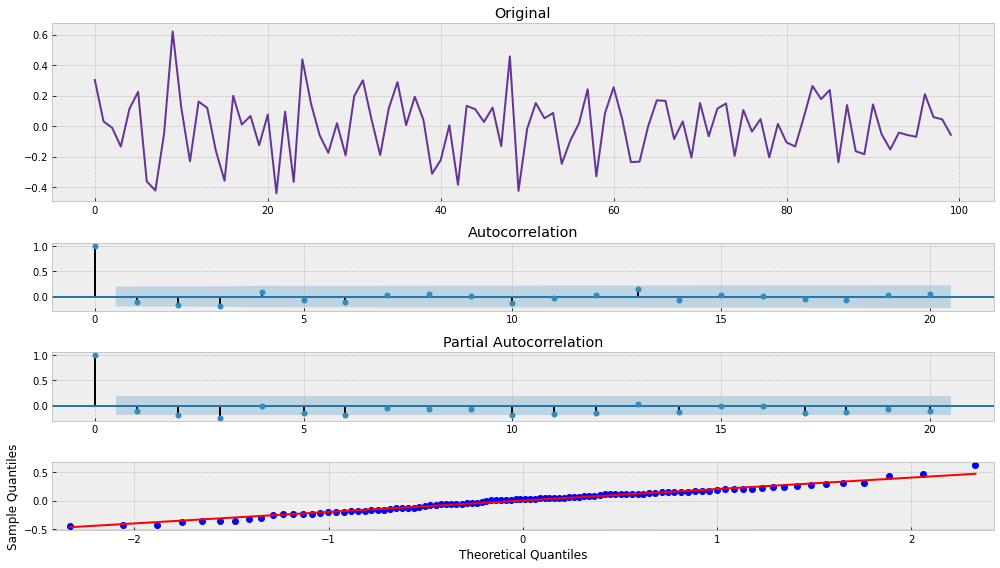

In [64]:
tsplot(mdl_diffed.resid)

!! p-value 3.825662e-20

In [65]:
# ARMA model

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for j in range(5):
        try:
            tmp_mdl = smt.ARMA(mdl_diffed.resid, order=(i, j)).fit(
                method='mle', trend='nc'
            )
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: -53.16129 | order: (0, 3)


C:\Users\kimta\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


Results of Dickey-Fuller Test:
Test Statistic                -1.015298e+01
p-value                        7.862172e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


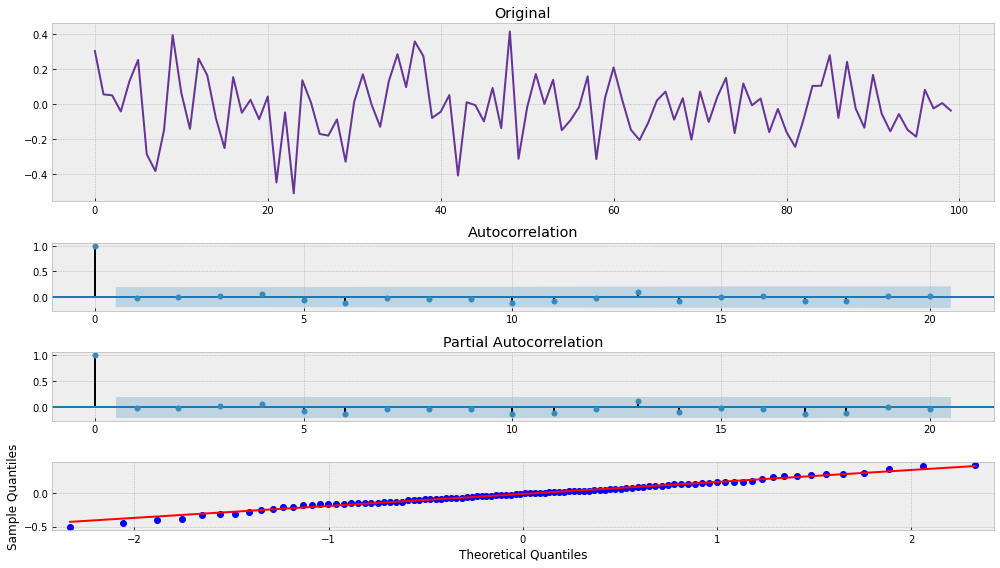

In [66]:
mdl_2 = smt.ARMA(mdl_diffed.resid, order=(0, 3)).fit(
                method='mle', trend='nc'
            )
tsplot(mdl_2.resid)

!! p-value 7.862172e-18

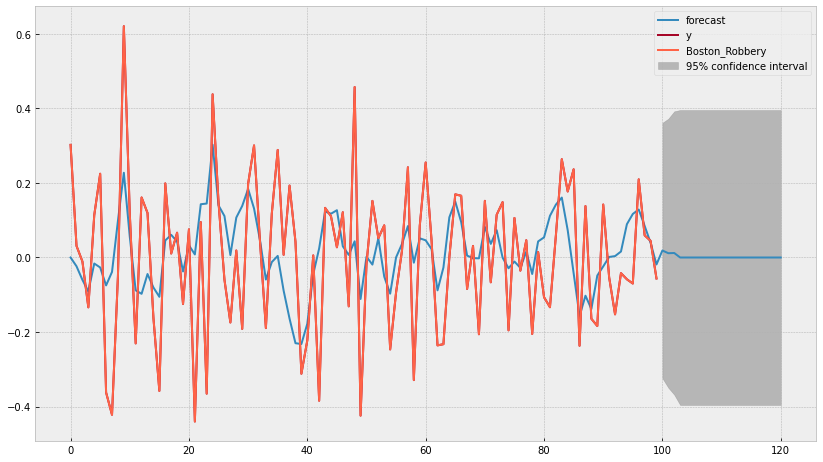

In [67]:
# Visualization
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    mdl_2.plot_predict(0, len(mdl_diffed.resid)+20, ax=ax)
    plt.plot(mdl_diffed.resid, color='tomato', label='Boston_Robbery')
    plt.legend()
    plt.show()

In [68]:
# ARIMA model

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(boston_armed_robberies_j['Count'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

C:\Users\kimta\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


aic: 1186.95060 | order: (4, 1, 4)


Results of Dickey-Fuller Test:
Test Statistic                -8.712767e+00
p-value                        3.554230e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


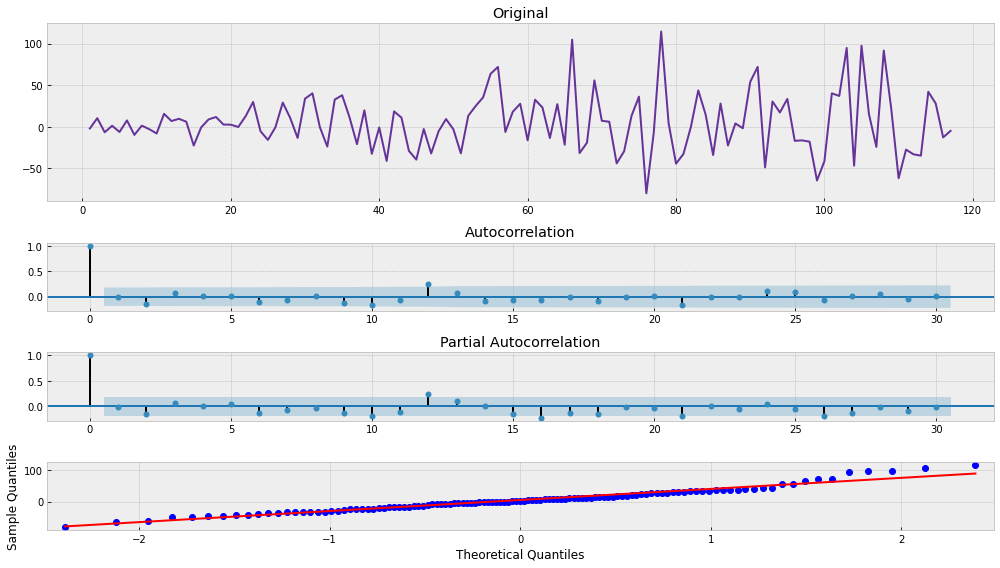

In [69]:
tsplot(best_mdl.resid, lags=30)

!! p-value 3.554230e-14

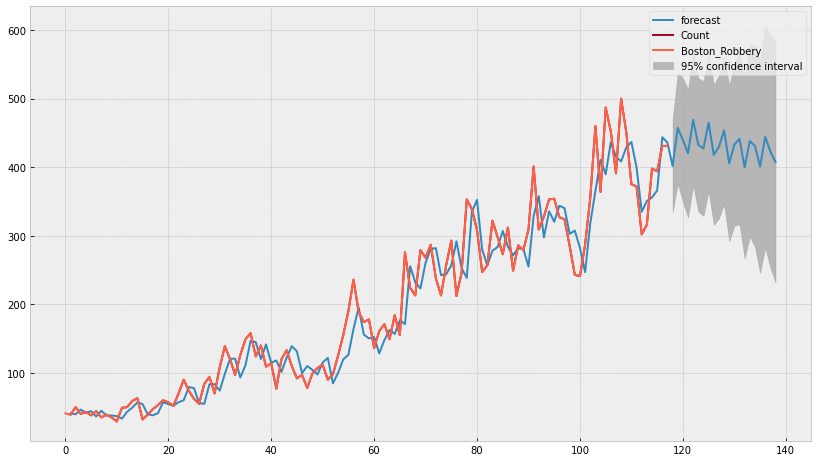

In [70]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    best_mdl.plot_predict(1, len(boston_armed_robberies_j['Count'])+20, ax=ax)
    plt.plot(boston_armed_robberies_j['Count'], color='tomato', label='Boston_Robbery')
    plt.legend()
    plt.show()